In [1]:
import pickle
import pandas as pd
from sklearn import tree

model = pickle.load(open("data/vtree.model.sav", "rb"))
features = (
    pd.read_csv("data/viscosity_train.csv", sep=";", decimal=",")
    .drop(["Viscosity"], axis=1)
    .columns.values.tolist()
)

rules = tree.export_text(model, feature_names=features)
print(rules)

|--- T <= 32.50
|   |--- TiO2 <= 0.18
|   |   |--- Al2O3 <= 0.18
|   |   |   |--- T <= 22.50
|   |   |   |   |--- TiO2 <= 0.03
|   |   |   |   |   |--- Al2O3 <= 0.03
|   |   |   |   |   |   |--- value: [3.71]
|   |   |   |   |   |--- Al2O3 >  0.03
|   |   |   |   |   |   |--- value: [4.66]
|   |   |   |   |--- TiO2 >  0.03
|   |   |   |   |   |--- value: [4.88]
|   |   |   |--- T >  22.50
|   |   |   |   |--- TiO2 <= 0.03
|   |   |   |   |   |--- Al2O3 <= 0.03
|   |   |   |   |   |   |--- value: [3.18]
|   |   |   |   |   |--- Al2O3 >  0.03
|   |   |   |   |   |   |--- value: [3.38]
|   |   |   |   |--- TiO2 >  0.03
|   |   |   |   |   |--- value: [4.24]
|   |   |--- Al2O3 >  0.18
|   |   |   |--- T <= 22.50
|   |   |   |   |--- value: [6.67]
|   |   |   |--- T >  22.50
|   |   |   |   |--- T <= 27.50
|   |   |   |   |   |--- value: [5.59]
|   |   |   |   |--- T >  27.50
|   |   |   |   |   |--- value: [4.73]
|   |--- TiO2 >  0.18
|   |   |--- T <= 22.50
|   |   |   |--- value: [7.13]


In [2]:
from src.rules import get_rules


rules = get_rules(model, features)
display(len(rules))
rules

35

[if (T > 32.5) and (T > 47.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) and (T > 52.5) and (T > 65.0) and (TiO2 <= 0.025) -> 1.194,
 if (T > 32.5) and (T > 47.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) and (T > 52.5) and (T > 65.0) and (TiO2 > 0.025) -> 1.289,
 if (T > 32.5) and (T > 47.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) and (T > 52.5) and (T <= 65.0) and (TiO2 <= 0.025) -> 1.548,
 if (T > 32.5) and (T > 47.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) and (T <= 52.5) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 1.629,
 if (T > 32.5) and (T > 47.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) and (T > 52.5) and (T <= 65.0) and (TiO2 > 0.025) -> 1.662,
 if (T > 32.5) and (T > 47.5) and (TiO2 <= 0.175) and (Al2O3 > 0.175) and (T > 65.0) -> 1.728,
 if (T > 32.5) and (T <= 47.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) and (T > 42.5) and (TiO2 <= 0.025) -> 1.832,
 if (T > 32.5) and (T > 47.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) and (T <= 52.5) and (TiO2 <= 0.025) and (Al2O3 > 0.025)

In [3]:
from src.rules import normalise_rules


rules = normalise_rules(rules)
display(len(rules))
rules

35

[if (T > 32.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 1.194,
 if (T > 32.5) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (Al2O3 <= 0.175) -> 1.289,
 if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 1.548,
 if (T > 32.5) and (T <= 52.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 1.629,
 if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (Al2O3 <= 0.175) -> 1.662,
 if (T > 32.5) and (TiO2 <= 0.175) and (Al2O3 > 0.175) -> 1.728,
 if (T > 32.5) and (T <= 47.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 1.832,
 if (T > 32.5) and (T <= 52.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) and (Al2O3 > 0.025) -> 1.897,
 if (T > 32.5) and (TiO2 > 0.175) -> 1.91,
 if (T > 32.5) and (T <= 52.5) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (Al2O3 <= 0.175) -> 2.109,
 if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.175) and (Al2O3 > 0.175) -> 2.16,
 if (T > 32.5) and (T <= 47.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 2.361,
 if (T > 32.5) and (T <= 47.5

In [4]:
from src.rules import delete_same_rules


rules = delete_same_rules(rules)
display(len(rules))
rules

26

[if (T > 32.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 1.194,
 if (T > 32.5) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (Al2O3 <= 0.175) -> 1.289,
 if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 1.548,
 if (T > 32.5) and (T <= 52.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 1.629,
 if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (Al2O3 <= 0.175) -> 1.662,
 if (T > 32.5) and (TiO2 <= 0.175) and (Al2O3 > 0.175) -> 1.728,
 if (T > 32.5) and (T <= 52.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) and (Al2O3 > 0.025) -> 1.897,
 if (T > 32.5) and (TiO2 > 0.175) -> 1.91,
 if (T > 32.5) and (T <= 52.5) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (Al2O3 <= 0.175) -> 2.109,
 if (T > 32.5) and (T <= 47.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 2.097,
 if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.175) and (Al2O3 > 0.175) -> 2.293,
 if (T > 32.5) and (T <= 47.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) and (Al2O3 > 0.025) -> 2.682,
 if (T >

In [5]:
from src.rules import get_features, vectorize_rules

features = get_features(rules, ["T"])
print(features)

df_rules = vectorize_rules(rules, features)
df_rules.head(5)

['(Al2O3 <= 0.175)', '(Al2O3 > 0.025)', '(Al2O3 > 0.175)', '(TiO2 <= 0.175)', '(TiO2 > 0.025)', '(TiO2 > 0.175)']


(Al2O3 <= 0.175)  \
rule                                                                  
if (T > 32.5) and (TiO2 <= 0.175) and (Al2O3 <=...                1   
if (T > 32.5) and (TiO2 <= 0.175) and (TiO2 > 0...                1   
if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.17...                1   
if (T > 32.5) and (T <= 52.5) and (TiO2 <= 0.17...                1   
if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.17...                1   

                                                   (Al2O3 > 0.025)  \
rule                                                                 
if (T > 32.5) and (TiO2 <= 0.175) and (Al2O3 <=...               0   
if (T > 32.5) and (TiO2 <= 0.175) and (TiO2 > 0...               0   
if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.17...               0   
if (T > 32.5) and (T <= 52.5) and (TiO2 <= 0.17...               0   
if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.17...               0   

                                                   (Al2O3 > 0.175)  \
rule                                                                 
if (T > 32.5) and (TiO2 <= 0.175) and (Al2O3 <=...               0   
if (T > 32.5) and (TiO2 <= 0.175) and (TiO2 > 0...               0   
if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.17...               0   
if (T > 32.5) and (T <= 52.5) and (TiO2 <= 0.17...               0   
if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.17...               0   

                                                   (TiO2 <= 0.175)  \
rule                                                                 
if (T > 32.5) and (TiO2 <= 0.175) and (Al2O3 <=...               1   
if (T > 32.5) and (TiO2 <= 0.175) and (TiO2 > 0...               1   
if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.17...               1   
if (T > 32.5) and (T <= 52.5) and (TiO2 <= 0.17...               1   
if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.17...               1   

                                                   (TiO2 > 0.025)  \
rule                                                                
if (T > 32.5) and (TiO2 <= 0.175) and (Al2O3 <=...              0   
if (T > 32.5) and (TiO2 <= 0.175) and (TiO2 > 0...              1   
if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.17...              0   
if (T > 32.5) and (T <= 52.5) and (TiO2 <= 0.17...              0   
if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.17...              1   

                                                   (TiO2 > 0.175) consequent  
rule                                                                          
if (T > 32.5) and (TiO2 <= 0.175) and (Al2O3 <=...              0      1.194  
if (T > 32.5) and (TiO2 <= 0.175) and (TiO2 > 0...              0      1.289  
if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.17...              0      1.548  
if (T > 32.5) and (T <= 52.5) and (TiO2 <= 0.17...              0      1.629  
if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.17...              0      1.662

c:\Users\user\Projects\python\fuzzy\.venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


{2: 0.42601604060235754,
 3: 0.7018993361356377,
 4: 0.8249121250065079,
 5: 1.0,
 6: 1.0}

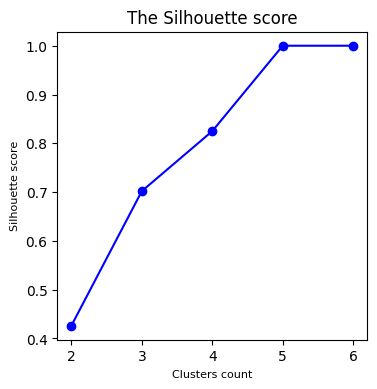

'The best clusters count is 5'

In [6]:
from src.cluster_helper import draw_best_clusters_plot, get_best_clusters_num

random_state = 9

X = df_rules.copy()
X = X.drop(["consequent"], axis=1)

clusters_score = get_best_clusters_num(X, random_state)
display(clusters_score)

draw_best_clusters_plot(clusters_score)

clusters_num = sorted(clusters_score.items(), key=lambda x: x[1], reverse=True)[0][0]
display(f"The best clusters count is {clusters_num}")

In [7]:
from sklearn import cluster

from src.cluster_helper import print_cluster_result

kmeans = cluster.KMeans(n_clusters=clusters_num, random_state=random_state)
kmeans.fit(X)

print_cluster_result(X, clusters_num, kmeans.labels_)

Кластер 1 (6):
if (T > 32.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 1.194;
if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 1.548;
if (T > 32.5) and (T <= 52.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 1.629;
if (T > 32.5) and (T <= 47.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 2.097;
if (T <= 32.5) and (T > 22.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 3.18;
if (T <= 32.5) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 3.707
--------
Кластер 2 (5):
if (T > 32.5) and (TiO2 <= 0.175) and (Al2O3 > 0.175) -> 1.728;
if (T > 32.5) and (T <= 65.0) and (TiO2 <= 0.175) and (Al2O3 > 0.175) -> 2.293;
if (T > 32.5) and (T <= 47.5) and (TiO2 <= 0.175) and (Al2O3 > 0.175) -> 3.842;
if (T <= 32.5) and (T > 22.5) and (TiO2 <= 0.175) and (Al2O3 > 0.175) -> 5.162;
if (T <= 32.5) and (TiO2 <= 0.175) and (Al2O3 > 0.175) -> 6.67
--------
Кластер 3 (5):
if (T > 32.5) and (TiO2 > 0.175) -> 1.91;
if (T > 32.5) and (T <= 65.0) and (TiO2 > 0.175) -> 2.688;
if (T > 32.5) an

In [8]:
viscosity_train = pd.read_csv("data/viscosity_train.csv", sep=";", decimal=",")
viscosity_test = pd.read_csv("data/viscosity_test.csv", sep=";", decimal=",")

display(viscosity_train.head(3))
display(viscosity_test.head(3))

T  Al2O3  TiO2  Viscosity
0  20    0.0   0.0      3.707
1  25    0.0   0.0      3.180
2  35    0.0   0.0      2.361

T  Al2O3  TiO2  Viscosity
0  30    0.0   0.0      2.716
1  40    0.0   0.0      2.073
2  60    0.0   0.0      1.329

In [9]:
from src.rules import simplify_and_group_rules

clustered_rules = simplify_and_group_rules(
    viscosity_train, rules, clusters_num, kmeans.labels_
)
clustered_rules

[[if (T = 70) and (TiO2 = 0.0) and (Al2O3 = 0.0) -> 1.194,
  if (T = 48.75) and (TiO2 = 0.0) and (Al2O3 = 0.0) -> 1.548,
  if (T = 42.5) and (TiO2 = 0.0) and (Al2O3 = 0.0) -> 1.629,
  if (T = 40.0) and (TiO2 = 0.0) and (Al2O3 = 0.0) -> 2.097,
  if (T = 27.5) and (TiO2 = 0.0) and (Al2O3 = 0.0) -> 3.18,
  if (T = 20) and (TiO2 = 0.0) and (Al2O3 = 0.0) -> 3.707],
 [if (T = 70) and (TiO2 = 0.0) and (Al2O3 = 0.3) -> 1.728,
  if (T = 48.75) and (TiO2 = 0.0) and (Al2O3 = 0.3) -> 2.293,
  if (T = 40.0) and (TiO2 = 0.0) and (Al2O3 = 0.3) -> 3.842,
  if (T = 27.5) and (TiO2 = 0.0) and (Al2O3 = 0.3) -> 5.162,
  if (T = 20) and (TiO2 = 0.0) and (Al2O3 = 0.3) -> 6.67],
 [if (T = 70) and (TiO2 = 0.3) -> 1.91,
  if (T = 48.75) and (TiO2 = 0.3) -> 2.688,
  if (T = 40.0) and (TiO2 = 0.3) -> 3.958,
  if (T = 27.5) and (TiO2 = 0.3) -> 5.405,
  if (T = 20) and (TiO2 = 0.3) -> 7.132],
 [if (T = 70) and (TiO2 = 0.1) and (Al2O3 = 0.0) -> 1.289,
  if (T = 48.75) and (TiO2 = 0.1) and (Al2O3 = 0.0) -> 1.662,
  

c:\Users\user\Projects\python\fuzzy\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


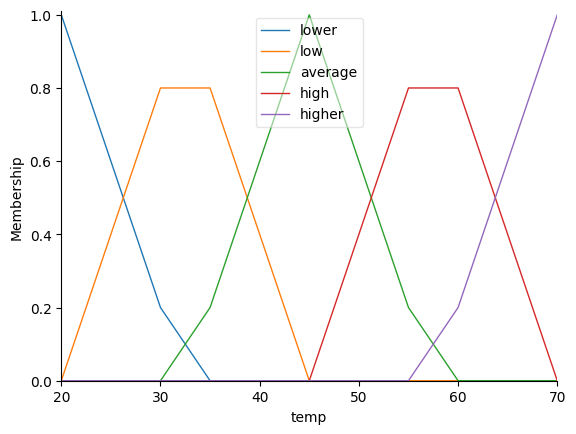

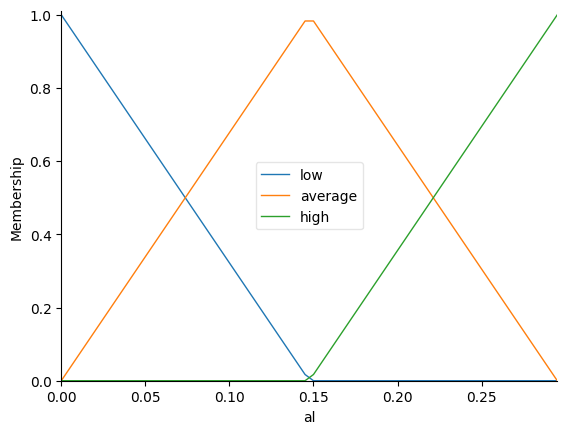

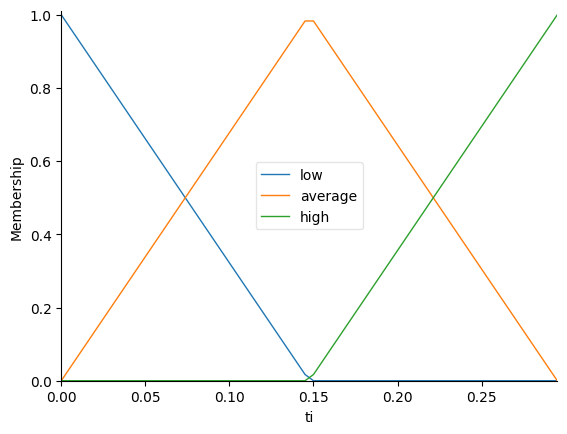

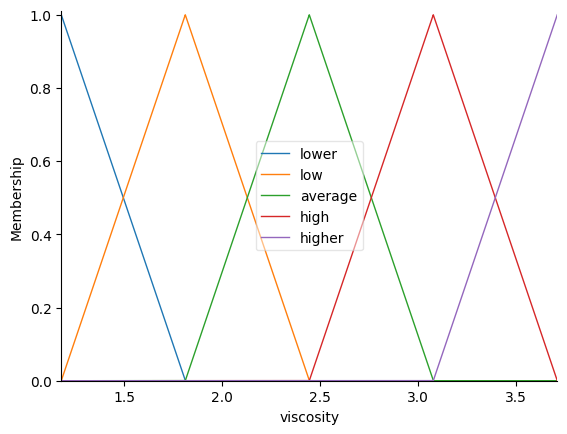

In [10]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz

temp = ctrl.Antecedent(viscosity_train["T"].sort_values().unique(), "temp")
al = ctrl.Antecedent(np.arange(0, 0.3, 0.005), "al")
ti = ctrl.Antecedent(np.arange(0, 0.3, 0.005), "ti")
viscosity = ctrl.Consequent(np.arange(1.18, 3.71, 0.00001), "viscosity")

temp.automf(5, variable_type="quant")
temp.view()
al.automf(3, variable_type="quant")
al.view()
ti.automf(3, variable_type="quant")
ti.view()
viscosity.automf(5, variable_type="quant")
viscosity.view()

In [11]:
from src.rules import  get_fuzzy_rules

fuzzy_variables = {"Al2O3": al, "TiO2": ti, "T": temp, "consequent": viscosity}
fuzzy_rules = get_fuzzy_rules(clustered_rules, fuzzy_variables)

fuzzy_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(fuzzy_cntrl, lenient=False)

display(len(fuzzy_rules))
fuzzy_rules

19

[IF (temp[higher] AND ti[low]) AND al[low] THEN viscosity[lower]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (temp[average] AND ti[low]) AND al[low] THEN viscosity[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (temp[low] AND ti[low]) AND al[low] THEN viscosity[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (temp[lower] AND ti[low]) AND al[low] THEN viscosity[higher]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (temp[higher] AND ti[low]) AND al[high] THEN viscosity[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (temp[average] AND ti[low]) AND al[high] THEN viscosity[higher]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (temp[low] AND ti[low]) AND al[high] THEN viscosity[higher]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (temp[lower] AND ti[low]) AND al[high] THEN viscosity[higher]


In [12]:
sim.input["temp"] = 20
sim.input["al"] = 0.0
sim.input["ti"] = 0.0
sim.compute()
sim.print_state()

display(sim.output["viscosity"])

 Antecedents 
Antecedent: temp                    = 20
  - lower                           : 1.0
  - low                             : 0.0
  - average                         : 0.0
  - high                            : 0.0
  - higher                          : 0.0
Antecedent: ti                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0
Antecedent: al                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0

 Rules 
RULE #0:
  IF (temp[higher] AND ti[low]) AND al[low] THEN viscosity[lower]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - temp[higher]                                           : 0.0
  - ti[low]                                                : 1.0
  - al[low]                                                : 1.0
                    (temp[

np.float64(3.499157499995422)

In [18]:
from sklearn import metrics
import math


def fuzzy_pred(row):
    sim.input["temp"] = row["T"]
    sim.input["al"] = row["Al2O3"]
    sim.input["ti"] = row["TiO2"]
    sim.compute()
    return sim.output["viscosity"]

def rmse(row):
    return math.sqrt(metrics.mean_squared_error([row["Real"]], [row["Inferred"]]))

result_train = viscosity_train.copy()
result_train["Real"] = result_train["Viscosity"]
result_train["Inferred"] = result_train.apply(fuzzy_pred, axis=1)
result_train["RMSE"] = result_train.apply(rmse, axis=1)
result_train.head(15)

T  Al2O3  TiO2  Viscosity   Real  Inferred      RMSE
0   20   0.00   0.0      3.707  3.707  3.499157  0.207843
1   25   0.00   0.0      3.180  3.180  3.188565  0.008565
2   35   0.00   0.0      2.361  2.361  2.732494  0.371494
3   45   0.00   0.0      1.832  1.832  1.812498  0.019502
4   50   0.00   0.0      1.629  1.629  1.812498  0.183498
5   55   0.00   0.0      1.465  1.465  1.812498  0.347498
6   70   0.00   0.0      1.194  1.194  1.390833  0.196833
7   20   0.05   0.0      4.660  4.660  3.481064  1.178936
8   30   0.05   0.0      3.380  3.380  3.090537  0.289463
9   35   0.05   0.0      2.874  2.874  2.703435  0.170565
10  40   0.05   0.0      2.489  2.489  2.365680  0.123320
11  50   0.05   0.0      1.897  1.897  2.054459  0.157459
12  55   0.05   0.0      1.709  1.709  2.128746  0.419746
13  60   0.05   0.0      1.470  1.470  1.465795  0.004205
14  20   0.30   0.0      6.670  6.670  3.499157  3.170843

In [19]:
result_test = viscosity_test.copy()
result_test["Real"] = result_test["Viscosity"]
result_test["Inferred"] = result_test.apply(fuzzy_pred, axis=1)
result_test["RMSE"] = result_test.apply(rmse, axis=1)
result_test = result_test.round({"RMSE": 3})
result_test

T  Al2O3  TiO2  Viscosity   Real  Inferred   RMSE
0   30   0.00  0.00      2.716  2.716  3.089540  0.374
1   40   0.00  0.00      2.073  2.073  2.359522  0.287
2   60   0.00  0.00      1.329  1.329  1.465795  0.137
3   65   0.00  0.00      1.211  1.211  1.414928  0.204
4   25   0.05  0.00      4.120  4.120  3.188565  0.931
5   45   0.05  0.00      2.217  2.217  2.045546  0.171
6   65   0.05  0.00      1.315  1.315  1.414928  0.100
7   70   0.05  0.00      1.105  1.105  1.408926  0.304
8   45   0.30  0.00      3.111  3.111  3.499157  0.388
9   50   0.30  0.00      2.735  2.735  3.475062  0.740
10  65   0.30  0.00      1.936  1.936  1.812498  0.124
11  30   0.00  0.05      3.587  3.587  3.111691  0.475
12  55   0.00  0.05      1.953  1.953  2.128746  0.176
13  65   0.00  0.05      1.443  1.443  1.414928  0.028
14  40   0.00  0.30      3.990  3.990  3.475062  0.515
15  50   0.00  0.30      3.189  3.189  3.475062  0.286
16  65   0.00  0.30      2.287  2.287  1.812498  0.475

In [17]:
import math

rmetrics = {}
rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["R2_test"] = metrics.r2_score(result_test["Real"], result_test["Inferred"])

rmetrics

{'RMSE_train': 1.0977710360150494,
 'RMSE_test': 0.4076186194536602,
 'RMAE_test': 0.5797504263400755,
 'R2_test': 0.813200460937507}